In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas_profiling import ProfileReport

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

%matplotlib inline

In [2]:
circuits = pd.read_csv('../data/raw/circuits.csv')
constructor_results = pd.read_csv('../data/raw/constructor_results.csv')
constructor_standings = pd.read_csv('../data/raw/constructor_standings.csv')
constructors = pd.read_csv('../data/raw/constructors.csv')
driver_standings = pd.read_csv('../data/raw/driver_standings.csv')
drivers = pd.read_csv('../data/raw/drivers.csv', parse_dates=[6])
lap_times = pd.read_csv('../data/raw/lap_times.csv')
pit_stops = pd.read_csv('../data/raw/pit_stops.csv')
qualifying = pd.read_csv('../data/raw/qualifying.csv')
races = pd.read_csv('../data/raw/races.csv', parse_dates=[5])
results = pd.read_csv('../data/raw/results.csv')
seasons = pd.read_csv('../data/raw/seasons.csv')
status = pd.read_csv('../data/raw/status.csv')

In [3]:
df = pd.merge(results,races[['raceId','year', 'name','round']],on='raceId', how='left')
df = pd.merge(df,drivers[['driverId','driverRef', 'nationality']],on='driverId', how='left')
df = pd.merge(df,constructors[['constructorId', 'name','nationality']],on='constructorId', how='left')

In [4]:
df.rename(columns={'rank': 'fastest_lap_rank', 'name_x': 'gp_name', 'nationality_x': 'driver_nationality', 'name_y': 'constructor_name', 'nationality_y': 'constructor_nationality', 'driver_ref': 'driver'}, inplace=True)
df = df.sort_values(by=['year', 'round','positionOrder'], ascending = [False, True, True])
df.reset_index(drop = True, inplace=True)

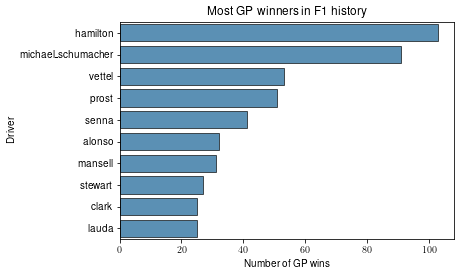

In [5]:
# drivers top 10 most wins
driver_racewins_count = df.loc[df['positionOrder'] == 1].groupby('driverRef')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
base_color = sb.color_palette()[0]
sb.barplot(data = driver_racewins_count.head(10), y = 'driverRef', x = 'positionOrder', color = base_color, alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history')
plt.ylabel('Driver')
plt.xlabel('Number of GP wins');

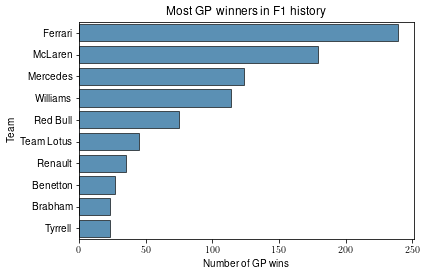

In [6]:
# constructor teams top 10 most wins
driver_racewins_count = df.loc[df['positionOrder'] == 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
base_color = sb.color_palette()[0]
sb.barplot(data = driver_racewins_count.head(10), y = 'constructor_name', x = 'positionOrder', color = base_color, alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history')
plt.ylabel('Team')
plt.xlabel('Number of GP wins');

In [7]:
current_drivers = df.loc[df['year'] == 2021].driverRef.drop_duplicates()
driver_positions_count = df.loc[df['driverRef'].isin(current_drivers) & (df['year'] == 2021)].sort_values(by=['constructor_name'])

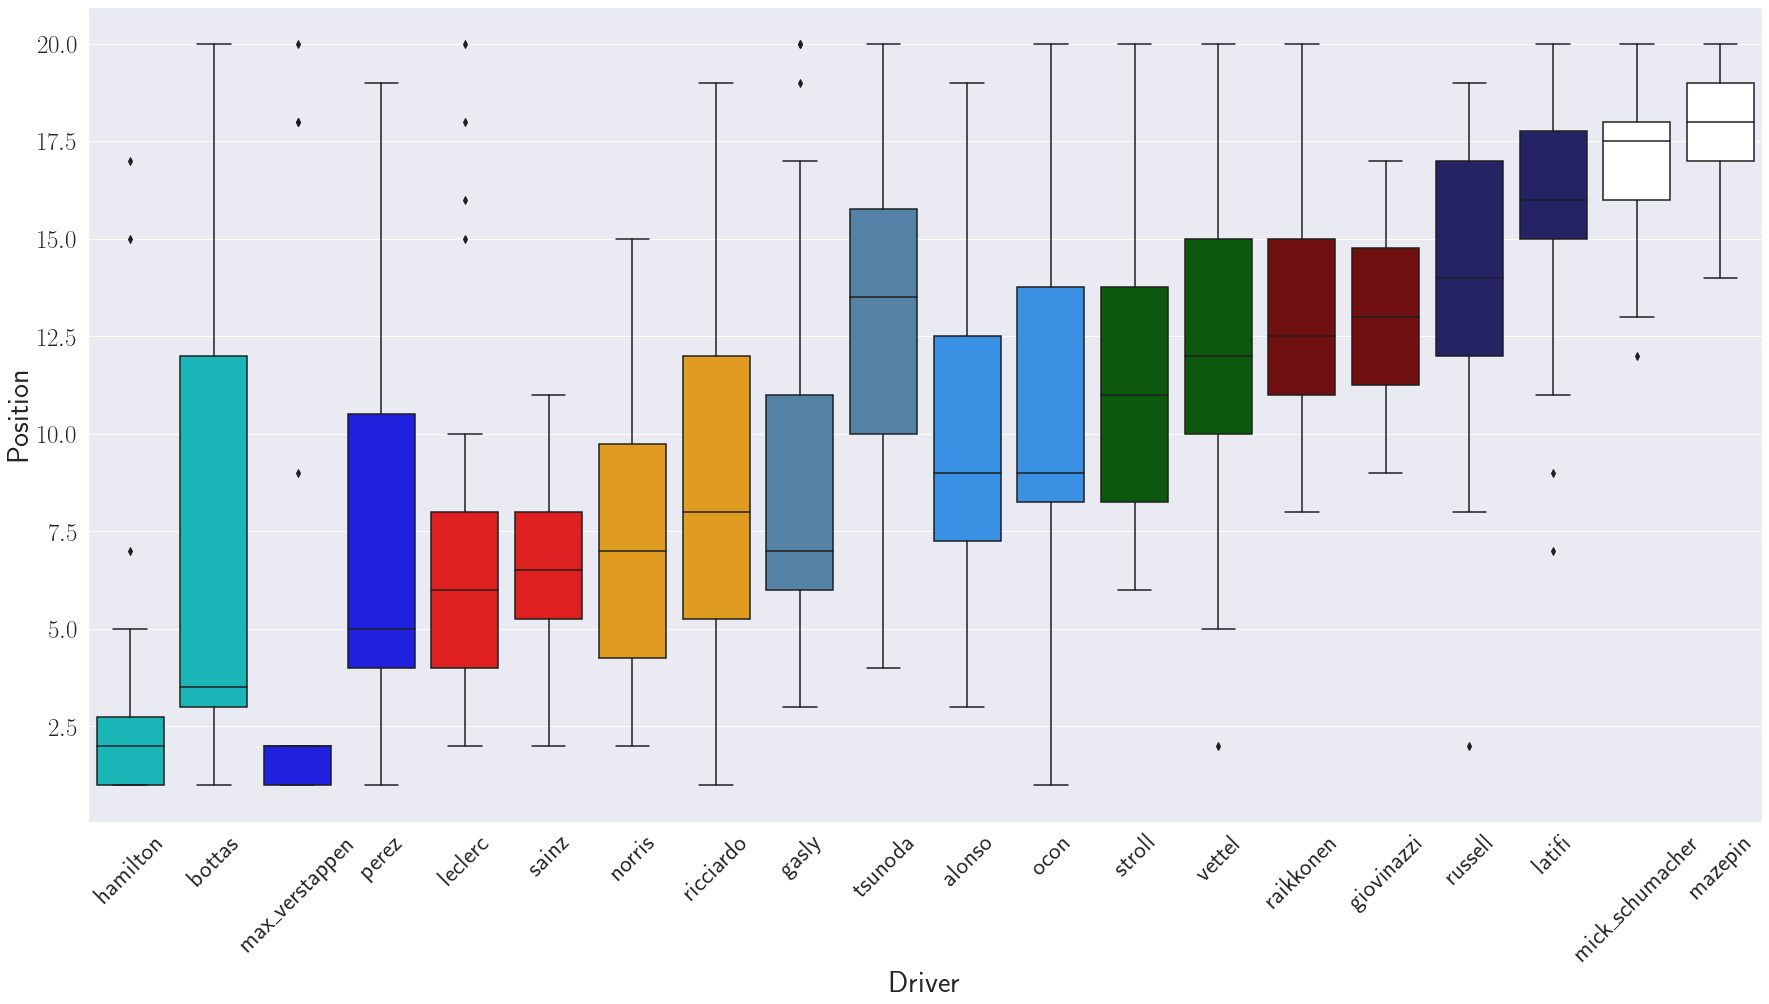

In [8]:
plt.figure(figsize=(30, 15))
sb.set(style="darkgrid")
label_list = ['0', '1', '2']
my_pal = {
          "Mercedes": "darkturquoise","hamilton": "darkturquoise", "bottas": "darkturquoise",
          "Red Bull":"blue", "max_verstappen":"blue", "perez":"blue", 
          "Ferrari":"red","leclerc":"red", "sainz":"red",
          "McLaren":"orange","norris":"orange", "ricciardo":"orange", 
          "gasly":"steelblue","AlphaTauri":"steelblue","tsunoda":"steelblue",
          "Aston Martin":"darkgreen", "stroll":"darkgreen", "vettel":"darkgreen",
          "Alpine F1 Team":"dodgerblue", "ocon":"dodgerblue", "alonso":"dodgerblue", 
          "giovinazzi":"maroon", "Alfa Romeo" : "maroon", "raikkonen":"maroon","kubica":"maroon",
          "Williams":"midnightblue","russell":"midnightblue","latifi":"midnightblue",
          "Haas F1 Team":"white", "mick_schumacher":"white","mazepin":"white" 
         }


sb.boxplot(x="driverRef", y="positionOrder", 
            order=['hamilton','bottas','max_verstappen','perez', 'leclerc', 'sainz', 'norris','ricciardo', 'gasly', 
                   'tsunoda','alonso','ocon','stroll', 'vettel','raikkonen','giovinazzi','russell','latifi',
                   'mick_schumacher','mazepin'],
            data = driver_positions_count, palette = my_pal)
plt.tick_params(axis='x', rotation=45, labelsize = 25)
plt.tick_params(axis='y',  labelsize = 25)
plt.xlabel("Driver",fontsize=30)
plt.ylabel("Position",fontsize=30)
# plt.title("Position frequency of each driver in 2021",fontsize=60)
plt.savefig("../reports/figures/driver_positions" + ".eps")

In [9]:
df_processed = pd.read_csv('../data/processed/0.1-initial-exploration.csv',index_col=False)
df_processed = df_processed.loc[:, ~df_processed.columns.str.contains('^Unnamed')]

df_processed.loc[:, 'positionOrder'] = pd.to_numeric(df_processed.loc[:, 'positionOrder'], errors='coerce')
df_processed.loc[:, 'ageAtRace'] = pd.to_numeric(df_processed.loc[:, 'ageAtRace'], errors='coerce')
df_processed.loc[:, 'ageAtDebut'] = pd.to_numeric(df_processed.loc[:, 'ageAtDebut'], errors='coerce')
df_processed.loc[:, 'yearsExperience'] = pd.to_numeric(df_processed.loc[:, 'yearsExperience'], errors='coerce')

df_processed = df_processed.drop(['resultId','raceId','constructorId','position','positionText','pointsGained',
'laps','time_x','milliseconds','fastestLapSpeed','fastestLapTime','fastestLap','statusId'
,'circuitName','date','dateOfDebut','status','driverStandingsId'], 1)


/var/folders/ww/g01k38ln5rx5dm_b_qtwpdkc0000gn/T/ipykernel_23521/1209955108.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_processed = df_processed.drop(['resultId','raceId','constructorId','position','positionText','pointsGained',


In [10]:
# profile = ProfileReport(df_processed, minimal=False, title="Exploratory Formula 1 Report")
# profile.to_file('../reports/output.html')